In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

import anndata
import scanpy as sc
%matplotlib inline

plt.style.use('default')
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

## function

In [16]:
def _plotrank1ratio(df, title=None,save=None):
    tmp = df.copy()
    clump = tmp['CellID'].value_counts().to_frame()
    clump_counts = clump['CellID'].value_counts()

    num = clump_counts.index
    top1_counts, top1_ratio, total_counts, label = [], [], [], []
    for i in num:
        counts = tmp.loc[tmp.CellID.isin(clump[clump['CellID']==i].index),'rank1'].values
        total = tmp.loc[tmp.CellID.isin(clump[clump['CellID']==i].index),'total'].values
        ratio = tmp.loc[tmp.CellID.isin(clump[clump['CellID']==i].index),'rank1_ratio'].values
        total_counts.append(total)
        top1_counts.append(counts)
        top1_ratio.append(ratio)
        label.append([i]*counts.shape[0])

    out = pd.DataFrame({'CellID':np.concatenate(top1_ratio),
                        'Class':np.concatenate(label)})
    plt.figure(figsize=(15,6))
    sns.boxplot(x="Class", y="CellID", data=out, linewidth=1.2, fliersize=0.8, width=0.6,showfliers=False,  saturation=1, palette=['#4692B9'])
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.ylabel('Rank_1 CellID ratio per cell',fontsize=25,labelpad=8)
    plt.xlabel('Clumps',fontsize=25,labelpad=8)
    if title:
        plt.title(title,fontsize=25, pad=8)
    if save:
        plt.savefig(save, bbox_inches='tight')

def heatmapPlot(data,
                cmap=None,
                threashold=None,
                fmt = 'd',
                minimum=0,
                figsize=(4,4),
                mask=None,
                title='',
                save=False):
    """
    """
    from matplotlib import pyplot as plt
    import seaborn as sns
    %matplotlib inline
    
    plt.figure(figsize=figsize)
    
    tmp = data.copy()
    if threashold is not None:
        tmp[tmp>=threashold] = threashold
    
    if cmap is None:
        cmap = sns.cubehelix_palette(light=1, as_cmap=True, rot=.3, dark=0.3)

    sns.set(font_scale=2.2,font='Helvetica')
    ax = sns.heatmap(tmp,
                     xticklabels=1,
                     yticklabels=1,
                     cmap=cmap,
                     mask=mask,
                     cbar_kws={"shrink": 1})
    plt.xticks(rotation=0, fontsize=25) 
    plt.yticks(rotation=0, fontsize=25)
    plt.title(title, fontsize=30, pad=8)

    thresh = tmp.max().max() / 1.5
    
    import itertools
    fontsize=20
    for i, j in itertools.product(range(data.shape[0]), range(data.shape[1])):
        if data.iloc[i, j] >= minimum:
            plt.text(j+0.5, i+0.6, format(data.iloc[i, j], fmt),
                 ha='center', 
                 va='bottom',
                 fontsize=fontsize,
                 color="white" if data.iloc[i, j] > thresh else "black")
    if save:
        plt.savefig(save,dpi=100,format='pdf',bbox_inches='tight')  

def _peiPlot(data, 
             label,
             title='',
             save=None):
    plt.rc('font', family='Helvetica')
    plt.rcParams['pdf.fonttype'] = 42

    # explode = (0.01,0.1)
    explode = tuple([0.02]*data.shape[0])

    # Creating color parameters
    colors = [(1.0, 0.4980392156862745, 0.054901960784313725),
              (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
              (1.0, 1.0, 0.6),
              '#f9a500',
              (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
              (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
              (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
              (0.8939638600538254, 0.5441753171856978, 0.7364859669357939),
              '#EDB188',
              '#c8cacc'
             ]

    # Wedge properties
    wp = { 'linewidth' : 0.7, 'edgecolor': "black" ,'width':0.3}

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = pct / 100.*np.sum(allvalues)
        return "{:.1f}%\n({:.0f})".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 10))
    wedges, texts, autotexts = ax.pie(data,
                                      radius=0.7, 
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode, 
                                      labels = label,
                                      # shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = {'fontsize': 20}
                                     )

    ax.legend(wedges, label,
              title ="The number of cells per clump",
              loc="center left",
              bbox_to_anchor=(0.95, 0, 0.5, 1),
              fontsize=18,
              title_fontsize=20,
             )

    plt.setp(autotexts, size = 15, weight ="bold")
    ax.set_title(title, fontsize=20, va='center',pad=1,)
    if save:
        plt.savefig(save, bbox_inches='tight')

## analysis

In [6]:
adata = sc.read_h5ad('./result/hgmm_mix/RNA/adata.h5ad')
adata.obs_names = [i.split('-')[0] for i in adata.obs_names]
ref = pd.read_csv('./cellranger/3M-february-2018.txt.gz', header=None,sep='\t', index_col=0)
ref.columns = ['CellID']
ref['RNA'] = ref.index
ref.index = ref['CellID']

In [ ]:
in_path = './result/hgmm_mix/CellID/'
fig_path = './figure/hgmm_mix/CellID/'

rank1_rank2_ratio_threashold = 2
clump_size = 20

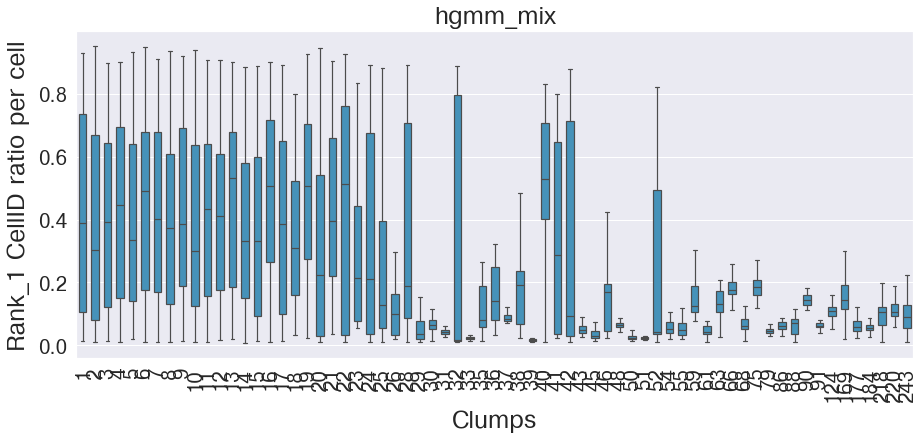

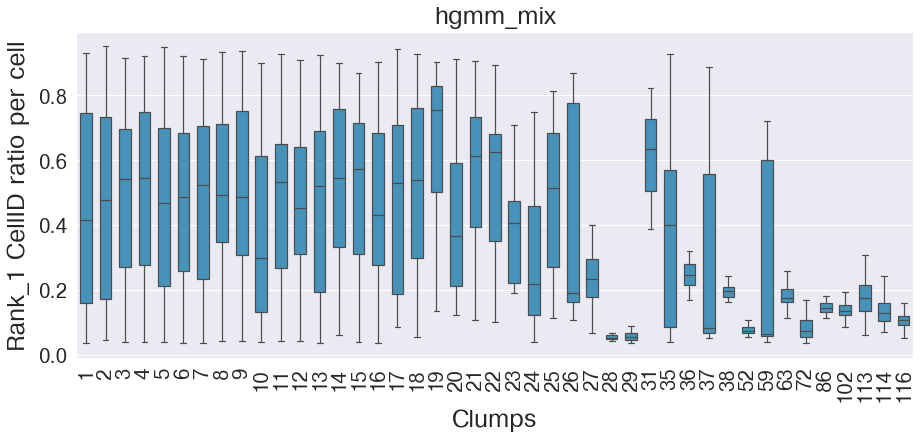

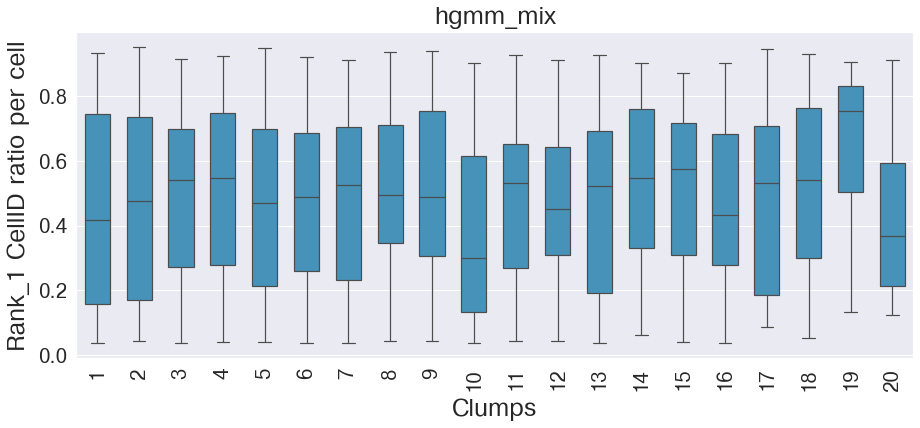

In [295]:
df = pd.read_csv(in_path + 'result.txt', sep='\t')
df.columns = ['CellID_Barcode'] + list(df.columns[1:])

df['RNA_Barcode'] = ref.loc[df['CellID_Barcode'].values, 'RNA'].values
df.index = df['RNA_Barcode'].values
_plotrank1ratio(df, title='hgmm_mix', save=fig_path+"CellID_clump1.pdf")

noise = pd.read_csv(in_path + 'noise_rank.txt', sep='\t', index_col=0)
noise_ratio = noise.div(noise.sum(axis=1), axis='rows')

rank1_threashold = np.percentile(noise['rank_1'].values, [25, 50, 75])[2]
rank1_ratio_threashold = np.percentile(noise_ratio['rank_1'].values, [25, 50, 75])[2]
    
df['qc'] = '0'
df.loc[(df['rank1']>rank1_threashold)&
       (df['rank1_ratio']>rank1_ratio_threashold)&
       (df['rank1']/df['rank2']>rank1_rank2_ratio_threashold),'qc']='1'

df = pd.concat([adata.obs, df], axis=1).reindex(adata.obs.index)
df['qc'] = df['qc'].fillna('0')
_plotrank1ratio(df.loc[df['qc']=='1'], title='hgmm_mix', save=fig_path+"CellID_clump2.pdf")

df_ = df.loc[df['qc']=='1',:]
clump = df_.loc[:, 'CellID'].value_counts().to_frame()
idx = clump[clump['CellID']<=clump_size].index
cells = df_.loc[df_['CellID'].isin(idx)].index
df['qc'] = '0'
df.loc[cells, 'qc'] = '1'
_plotrank1ratio(df.loc[df['qc']=='1'], title='hgmm_mix', save=fig_path+"CellID_clump3.pdf")

df.to_csv(in_path + 'result_qc.txt', sep='\t')

## cross-contamination

In [15]:
df = pd.read_csv(in_path + 'result_qc.txt', sep='\t', index_col=0)
df = df.fillna('unknown')
df = df.loc[df['CellID_Barcode']!='unknown']
df['CellID_species'] = [i[-8:] for i in df['CellID'].values]
df['CellID_clump'] = [i[:-8] for i in df['CellID'].values]

df['species_CellID'] = 'GRCm39'
df.loc[df['CellID_species']=='CAGATAGT','species_CellID']='GRCh38'
df = df.loc[df['total_counts']>=1000,:]

0.05987135081642751

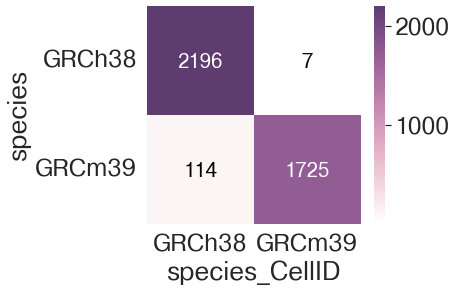

In [434]:
obs = df.loc[df['qc']=='1']
obs = obs.loc[obs['species'].isin(['GRCh38','GRCm39']),:]

obs['CellID_species'] = [i[-8:] for i in obs['CellID'].values]
obs['species_CellID'] = 'GRCm39'
obs.loc[obs['CellID_species']=='CAGATAGT','species_CellID']='GRCh38'
data = obs.groupby('species')['species_CellID'].value_counts().unstack()

heatmapPlot(data, 
            figsize=(4.8,4),
            save=fig_path+"after_qc.pdf")
2*(data.loc['GRCm39','GRCh38'] + data.loc['GRCh38','GRCm39'])/data.sum().sum()

In [11]:
def InteractionStrength(clumps, cts, method='intensity', weight=False):
    """
    """
    from scipy.special import perm, comb
    out = []
    for clump in clumps:
        df_tmp = pd.DataFrame(index=cts, columns=cts)
        df_tmp = df_tmp.fillna(0)
        tmp = pd.Series(clump).value_counts()
        c = tmp.index
        if method == 'intensity':
            for c1 in c:
                for c2 in c:
                    if tmp.sum()<2:
                        print(clump)
                    if c1 == c2:
                        df_tmp.loc[c1,c2]=comb(tmp[c1],2)/comb(tmp.sum(),2)
                    else:
                        df_tmp.loc[c1,c2]=(tmp[c1]*tmp[c2])/comb(tmp.sum(),2)
            if weight==True:
                out.append(df_tmp*tmp.sum())
            else:
                out.append(df_tmp)
        elif method == 'comb':
            for c1 in c:
                for c2 in c:
                    if c1 == c2:
                        df_tmp.loc[c1,c2]=comb(tmp[c1],2)
                    else:
                        df_tmp.loc[c1,c2]=tmp[c1]*tmp[c2]
            out.append(df_tmp)
        elif method == 'count':
            for i in range(len(clump)):
                for j in range(len(clump)):
                    if i!=j:
                        df_tmp.loc[clump[i],clump[j]]=1
            out.append(df_tmp)
    out = pd.DataFrame(np.sum(out, axis=0), index=cts, columns=cts)
    return out   

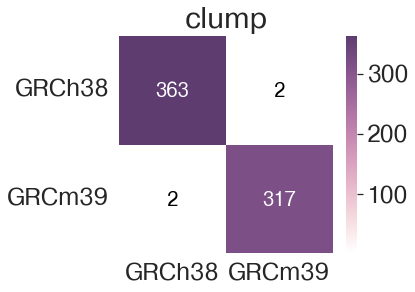

In [24]:
obs = df[df['species'].isin(['GRCm39','GRCh38'])]
obs = obs.loc[obs['species'] == obs['species_CellID']]
obs = obs.loc[obs['qc']==1]

clumps_all = obs.groupby('CellID_clump')['species'].apply(lambda x:list(x))
clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)

s = 0
for clump in clumps:
    tmp = pd.Series(clump).nunique()
    if tmp>1:
        s = s+1

intensity = InteractionStrength(clumps, ['GRCm39','GRCh38'], method='count', weight=False)
intensity = intensity.loc[['GRCh38','GRCm39'],['GRCh38','GRCm39']]
heatmapPlot(intensity, 
            figsize=(4.8,4), 
            # fmt = '%d', 
            title='clump',
            save=fig_path+"clump_qc.pdf")

## clump plot

In [ ]:
df = pd.read_csv('./result/hgmm_mix/CellID/result_qc.txt', sep='\t', index_col=0)
df['CellID_species'] = [i[-8:] for i in df['CellID'].values]
df['CellID_clump'] = [i[:-8] for i in df['CellID'].values]

df['species_CellID'] = 'GRCm39'
df.loc[df['CellID_species']=='CAGATAGT','species_CellID']='GRCh38'
df = df.loc[df['total_counts']>=1000,:]

df = df.loc[df['qc']=='1']
df = df.loc[df['species'].isin(['GRCh38','GRCm39']),:]

In [14]:
clump = df['CellID_clump'].value_counts().to_frame()
clump[clump>10] = 10
clump_counts = clump['count'].value_counts()
clump_counts = clump_counts.reindex([1,2,3,4,5,6,7,8,9,10])
cell_counts = pd.Series(clump_counts.index * clump_counts.values, index=clump_counts.index)
cell_counts[10] = df.shape[0] - cell_counts.sum()+cell_counts[10]

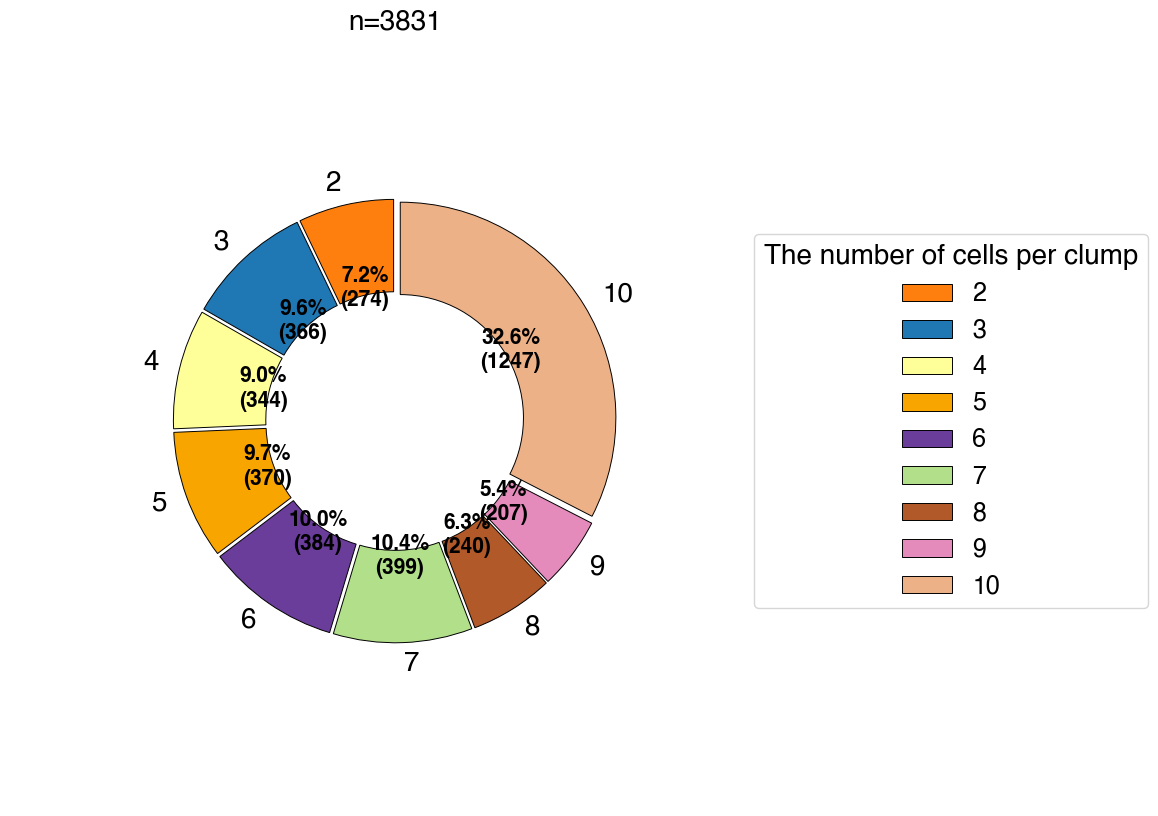

In [17]:
_peiPlot(data=cell_counts.values[1:], 
     label=cell_counts.index[1:],
     title='n={}'.format(str(cell_counts[1:].sum())),
     save='./figure/hgmm_mix/CellID/clump_cell.pdf')